# Exploring Chicago's Covid Positivity Test Rate By Zip

Created On: 2020-08-01

Description: We will explore the relationship of Covid-19 positive test rate in Chicago zip codes by their median household income. The data for this analysis comes from different sources, and therefore we will need to merge them together. We will use the Pandas `.merge()` function for this. 


Data Sources:
- [Census Data - 2017: ACS 5-Year Estimates Subject Tables (manually looking at each zip)](https://data.census.gov/cedsci/table?q=median%20household%20income%2060612&g=8600000US60612&tid=ACSST5Y2017.S1901&t=Income%20%28Households,%20Families,%20Individuals%29%3AHousehold%20and%20Family)
- [Illinois Department of Health collected on 2020-08-01](https://www.dph.illinois.gov/covid19/covid19-statistics)

In [13]:
# Import the needed packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

### Import and Prep Data

In [10]:
df_covid = pd.read_csv('covid_cases_by_zip.csv')
df_covid.head()

,zip,tested,positive_cases
0,60002,2472,151
1,60004,11377,439
2,60005,5957,282
3,60007,5074,409
4,60008,5445,425


In [11]:
df_chicago_income = pd.read_csv('chicago_median_income_by_zip.csv',
                                thousands=',')
df_chicago_income.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


### Merge and Analyze the Data

Step 1. We will merge the covid testing data with the income data from Chicago.

In [14]:
df_income_covid = df_chicago_income.merge(df_covid, how='left', on='zip')

In [15]:
df_income_covid.head()

,zip,income,tested,positive_cases
0,60630,70122,10573.00,959.00
1,60640,50488,19708.00,1028.00
2,60622,87143,12887.00,825.00
3,60614,100116,14985.00,727.00
4,60608,41226,17844.00,2050.00


Step 2. Compute the positive test rate

In [16]:
df_income_covid['positive_test_rate'] = (df_income_covid['positive_cases'] / df_income_covid['tested'])

In [17]:
df_income_covid.head()

,zip,income,tested,positive_cases,positive_test_rate
0,60630,70122,10573.00,959.00,0.09
1,60640,50488,19708.00,1028.00,0.05
2,60622,87143,12887.00,825.00,0.06
3,60614,100116,14985.00,727.00,0.05
4,60608,41226,17844.00,2050.00,0.11


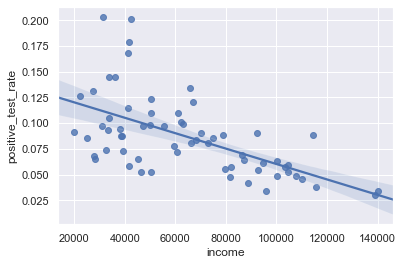

In [18]:
sns.regplot(x='income', y='positive_test_rate', data=df_income_covid)

### Conclusion

It is clear from the trend line that in general, the more the median household income, the lower the positive test rate of that zip code. There are likely many underlying causes for this. However, it's pretty clear that those who earn the least also appear to be suffering the most from Covid.

If you are interested in finding more surprising relationships within government data, then please check out my Datacamp course [Joining Data with pandas](https://www.datacamp.com/courses/joining-data-with-pandas). Here we will join different public datasets together from Chicago to find disturbing relationships about the distribution of business grants and more.